In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Looking to the data

This step consist in look to the data to have an overview, understand the nature of the data, and analyse the data from the hyphoteses(classify male and female) perspective.

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_data = pd.read_csv('MyDrive/Colab Notebooks/sex_predictor/test_data_CANDIDATE.csv', index_col='index')

In [ ]:
df_data

age sex     cp  trestbps   chol  fbs  ...  ca  thal  nar  hc  sk          trf
index                                        ...                                    
0       49   M  10000       130  269.0    0  ...   0     2    2   0   1  6797.761892
1       61   F  10000       138  166.0    0  ...   1     2    2   1   3  4307.686943
2       46   F  10000       140  311.0    0  ...   2     3    2   0   1  4118.077502
3       69   F  10000       140  254.0    0  ...   3     3    2   1   0  7170.849469
4       51   F  10000       100  222.0    0  ...   0     2    2   1   0  5579.040145
...    ...  ..    ...       ...    ...  ...  ...  ..   ...  ...  ..  ..          ...
283     54   F  10000       125  273.0    0  ...   1     2    2   2   0  6293.123474
284     42   F  10000       120  240.0    1  ...   0     3    2   0   1  3303.841931
285     67   M  10000       106  223.0    0  ...   2     2    2   1   0  3383.029119
286     67   F  10000       125  254.0    1  ...   2     3    2   0   2   768.900795
287     60   F  10000       130  253.0    0  ...   1     3    2   0   0  1508.832825

[288 rows x 17 columns]

Looking for only a simple sample printed above we can presume that we will have to deal with some data cleaning and preparing, which is what is being done in the next steps.

#### data wrangling & Transformations

- correction in the variable type (if need)
- deal with nulls
- duplicated lines

In [ ]:
df_data.dtypes

index         int64
age           int64
sex          object
cp            int64
trestbps      int64
chol        float64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal          int64
nar           int64
hc            int64
sk            int64
trf         float64
dtype: object

In [ ]:
df_data.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol         16
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       143
ca            0
thal          0
nar           0
hc            0
sk            0
trf           0
dtype: int64

In [ ]:
df_data.sex.replace('m', 'M', inplace=True)
df_data.sex.replace('f', 'F', inplace=True)
df_data.sex.value_counts()

F    196
M     92
Name: sex, dtype: int64

looking to the bellow chart we can interpret some points:

- Almost 50% of the data in the column `slope` is null (targeted as -1 in the graphic), based on this, is not a good idea to drop 50% of the dataset.
- there are only other three possible values in the dataset (0, 1, 2), this values by itself do not have any information about the sex.
- To estimate this value from other variable is not possible, as we can see in the second graphic, there are no linear relation between this variables.
- Based on some reading about the meaning of this information, is not a good idea to infer it's value by the commom methods (repeat before or next entry, fill with other value)

Based on this is decided to remove this feature from the dataset thinking in the confiability of the values and how much it can improve a classification model.

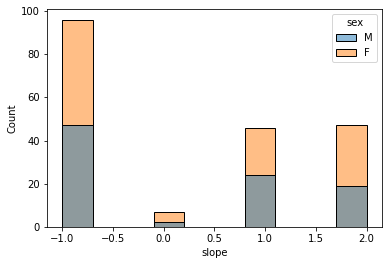

In [ ]:
sns.histplot(df_data[['slope', 'sex']].fillna(-1), x='slope', hue='sex')

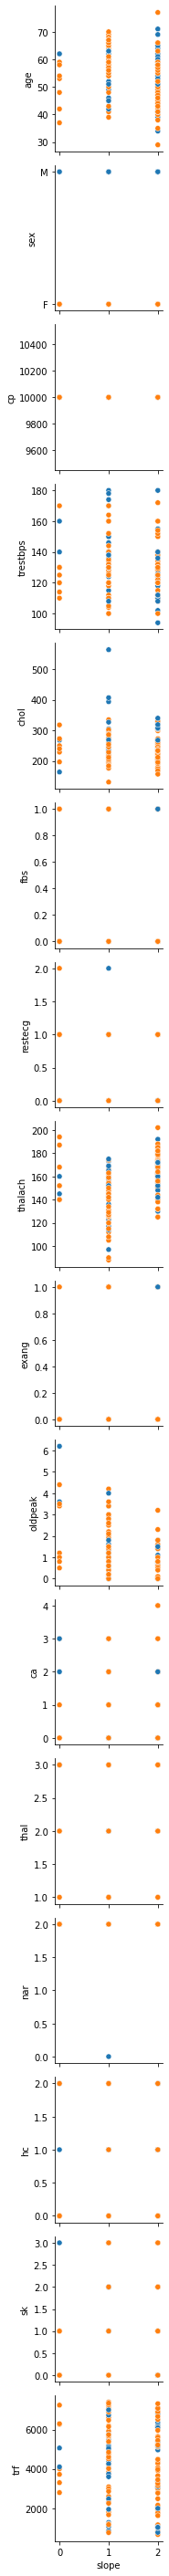

In [ ]:
cols = list(df_data.columns)
cols.remove('slope')

g = sns.PairGrid(df_data, x_vars='slope', y_vars=cols, hue='sex', dropna=True)
g = g.map(sns.scatterplot)

In [ ]:
df_data.drop('slope', axis=1, inplace=True)

In [ ]:
df_data['sex'].value_counts()

F    196
M     92
Name: sex, dtype: int64

Now, to deal with the nulls of the `chol`column, based on the bellow graphic some observations were made:

- We can't infer the values only based on the visualization, it shows the `chol` variable density, we can see that both classes have similar chol distribuition (the value in y column is because the classes M and F are unbalanced.

Based on the nature of the variable, only the rows with this null values will be dropped because, first: little rows, second: try to infer a value of a possible health problem can cause a distortion in the data.

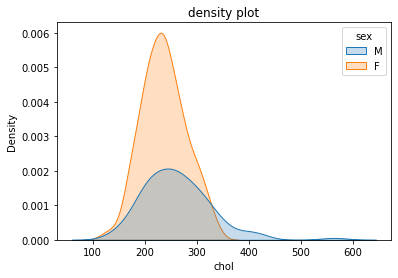

In [ ]:
ax = sns.kdeplot(df_data['chol'], shade=True, hue=df_data['sex']).set_title('density plot')
plt.show()

In [ ]:
df_data.dropna(inplace=True)
df_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
ca          0
thal        0
nar         0
hc          0
sk          0
trf         0
dtype: int64

Also, as we can see, the column `cp` has only one type of data, based on the meaning of this variable "chest pain type" it is a categorical variable and the dataset corresponds to only one type of chest pain, then as this column do not contribute it will be dropped too.

In [ ]:
df_data.nunique()

age          41
sex           2
cp            1
trestbps     46
chol        149
fbs           2
restecg       3
thalach      88
exang         2
oldpeak      40
ca            5
thal          4
nar           3
hc            3
sk            4
trf         272
dtype: int64

In [ ]:
df_data.drop('cp', axis=1, inplace=True)

In [ ]:
# do not have duplicated lines
df_data.duplicated().sum()

0

In the table bellow we are looking only for not categorical columns to check if the data makes sense, no outliers and understand data characteristics.

In [ ]:
df_data.describe()

age    trestbps        chol  ...          hc          sk          trf
count  272.000000  272.000000  272.000000  ...  272.000000  272.000000   272.000000
mean    54.702206  131.360294  245.139706  ...    0.591912    0.963235  4118.031708
std      9.122552   17.360800   52.985157  ...    0.647739    1.008511  1997.468770
min     29.000000   94.000000  126.000000  ...    0.000000    0.000000   653.415425
25%     48.000000  120.000000  208.000000  ...    0.000000    0.000000  2578.495636
50%     56.000000  130.000000  239.500000  ...    1.000000    1.000000  4177.495232
75%     61.000000  140.000000  273.250000  ...    1.000000    2.000000  5840.685393
max     77.000000  200.000000  564.000000  ...    2.000000    3.000000  7389.481550

[8 rows x 14 columns]

To confirm the observatations in the previous table is ploted a chart to look the distribuition of the data and the correlation between the variables in order to look for some behavior that can confirm the hiphotesys of sex classification.

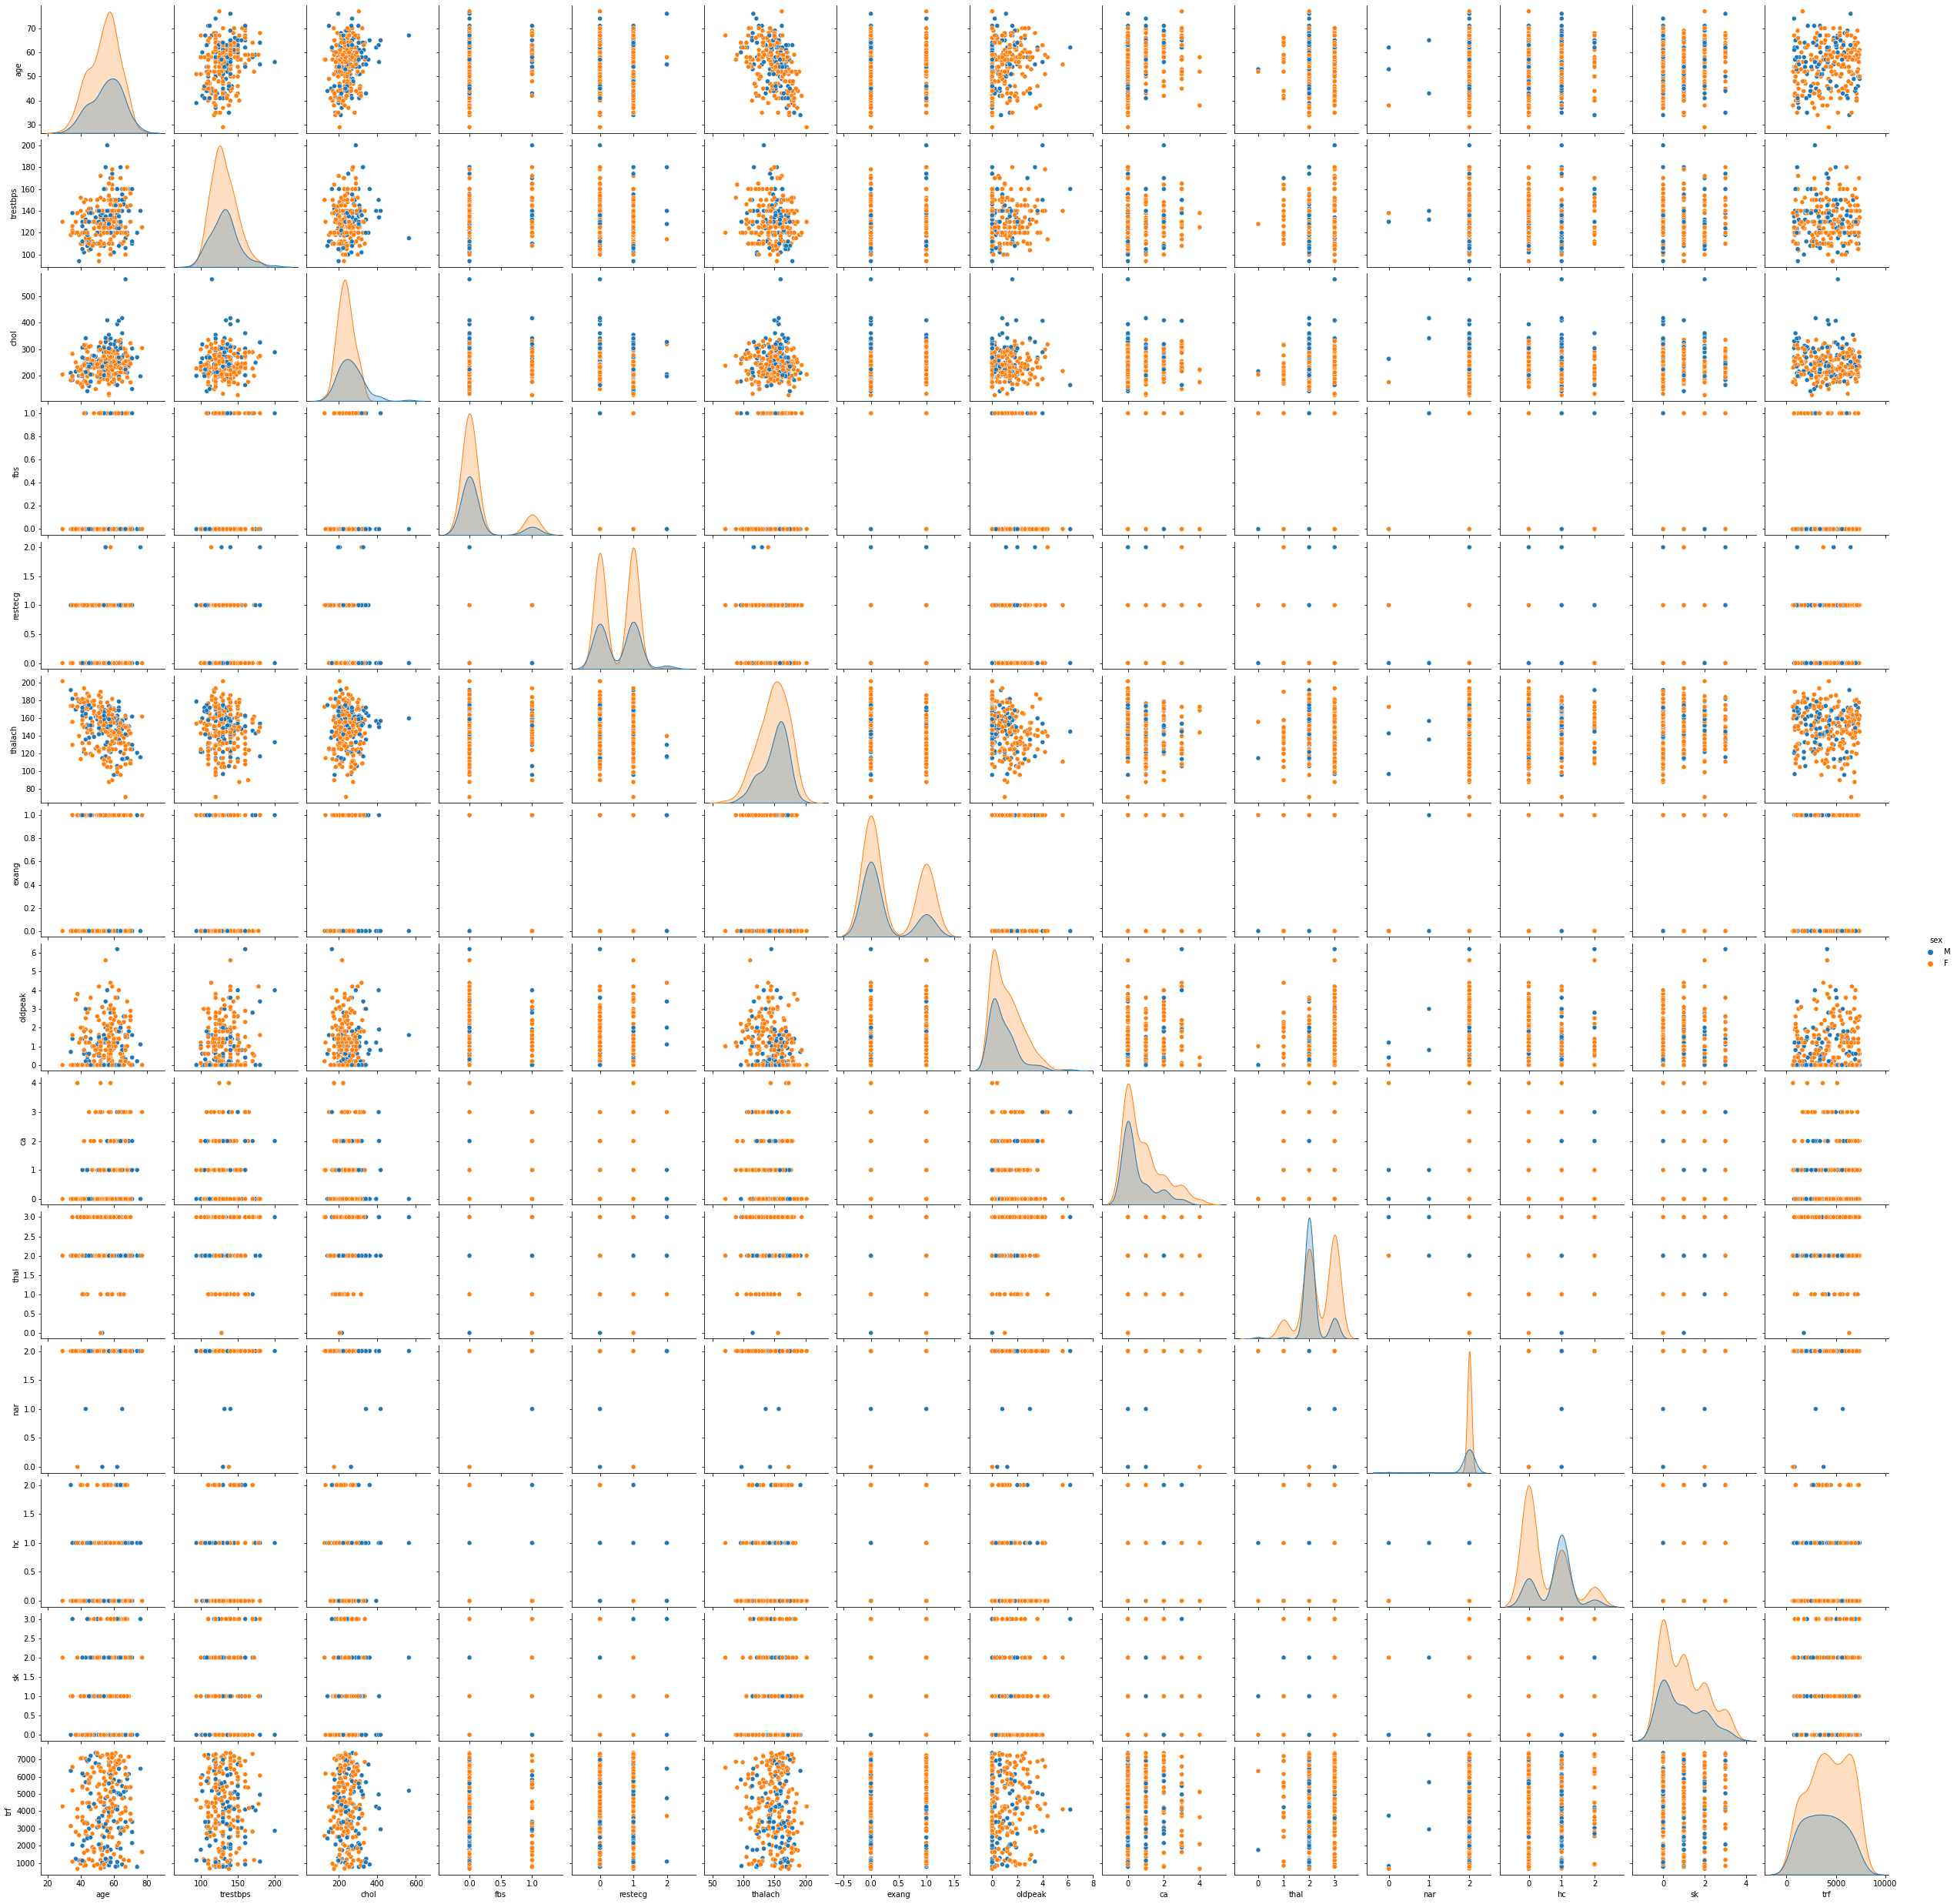

In [ ]:
sns.pairplot(df_data, hue="sex")
# you can zoom the image by clicking

The next step to analyse the data is normalize and standartize the data in order to look in a more statitical perspective.

In [161]:
df_feats = df_data[['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'nar', 'hc', 'sk', 'trf']]
df_feats = (df_feats-df_feats.mean())/df_feats.std()
df_feats

age  trestbps      chol  ...        hc        sk       trf
index                                ...                              
0     -0.625067 -0.078354  0.450320  ... -0.913813  0.036454  1.341563
1      0.690354  0.382454 -1.493620  ...  0.630020  2.019577  0.094948
2     -0.953922  0.497656  1.242995  ... -0.913813  0.036454  0.000023
3      1.567302  0.497656  0.167222  ...  0.630020 -0.955107  1.528343
4     -0.405830 -1.806385 -0.436721  ...  0.630020 -0.955107  0.731430
...         ...       ...       ...  ...       ...       ...       ...
283   -0.076975 -0.366360  0.525813  ...  2.173852 -0.955107  1.088924
284   -1.392396 -0.654365 -0.097003  ... -0.913813  0.036454 -0.407611
285    1.348065 -1.460779 -0.417847  ...  0.630020 -0.955107 -0.367967
286    1.348065 -0.366360  0.167222  ... -0.913813  1.028016 -1.676687
287    0.580736 -0.078354  0.148349  ... -0.913813 -0.955107 -1.306253

[272 rows x 14 columns]

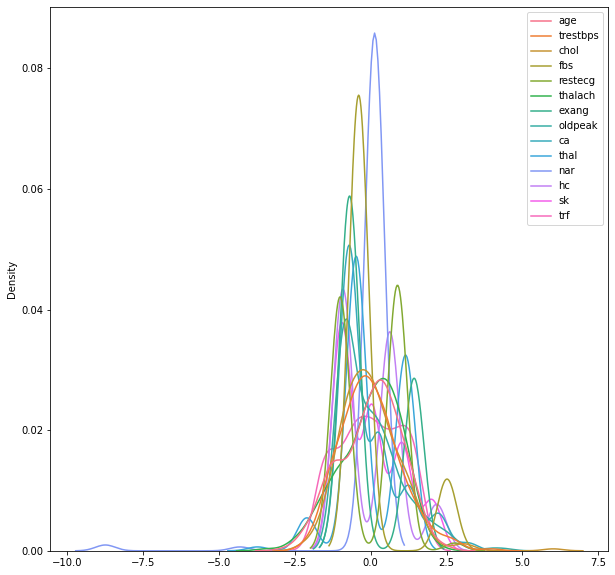

In [168]:
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_feats)
plt.show()

In the figure above, with the data normalized we can see the normal distribuition in almost all the features, some of it are a bimodal or trimodal curve because are categorical data or some discret/limited data.

Looking for this distribuition we can be a little more happy that it will work, but let's work a little more.


p.s.: this categorical data will be removed, I'm using only by facility.

Having this knowledge, we can try to create a model even not trying some hypothesis test (because the time).